# Séries temporelles avec Pandas

L'analyse temporelle est une partie essentielle de l'analyse de données. 

Dans cette partie vous verrez : 

- L'objet Datetime
- Quelles sont les fonctions de traitement de dates sous Pandas
- Les fonctions d'aggrégation temporelles

Pandas dispose de plusieurs méthode pour gérer et manipuler des données temporelles :

## Datetime (Python)

Le module **Datetime** en Python permet de réaliser plusieurs opérations avec des dates : 

In [1]:
from datetime import datetime

now = datetime.now()

l'objet **Datetime** stocke la date et l'heure jusqu'à la microsecond, jugez plutôt : 

In [ ]:
now 

Nous pouvons accéder à différentes à l'année, le mois, le jour etc.. 

In [ ]:
print now.year
print now.month
print now.day

## String --> datetime

Bien entendu, les données temporelles sont rarement stockées au format dates. Elles sont souvent stockées et parsées sous forme de texte

La méthode **strptime** du module **datetime** de Python permet de transformer un String en datetime en y intégrant un **format de date**

In [6]:
chaine = '2013-02-13'

In [5]:
datetime.strptime(chaine,'%Y-%m-%d')

NameError: name 'chaine' is not defined

On peut retrouver l'intégralité des formats de date ici - https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [4]:
import pandas as pd
import numpy as np

Pandas permet de parse facilement les données d'une Série grâce à la méthode **to_datetime** :

In [ ]:
datestring = ['2013-04-03', '2013-04-04', '2013-04-05', '2013-04-06']

In [ ]:
pd.to_datetime(datestring)

Remarquons que la **liste** datestring a été transformée en objet Pandas **tseries.index.DatetimeIndex** 

Plusieurs options (qui dépasse ce focus) sont également à noter : la longueur de la série, la fréquence, la timezone etc..

## Time et DataFrame 

Lorsque vous disposez d'un set de données contenant des données temporelles, il advient de bien indexer en utilisant l'objet  **DatetimeIndex**. 

Prenons par exemple une nouvelle liste de dates (format chaine) : 

In [ ]:
datestr = ['2013-04-03', '2013-04-04', '2013-04-05', '2013-05-06','2014-06-07','2014-07-08']

Nous transformons cette liste de String en un objet DatetimeIndex en utilisant la méthode **to_datetime** :

In [ ]:
dates = pd.to_datetime(datestr)

Si nous souhaitons maintenant créer un DataFrame, nous pouvons spécifier, au moment de la création, l'index à utiliser grâce au paramètre **index** :

In [ ]:
df = pd.DataFrame(np.random.randn(6,2),
                  index = dates,
                  columns = ['col1','col2'])

In [ ]:
df

La plupart des DataFrame que vous utiliserez seront lus au sein de fichier extérieurs (e.g : csv) 

La méthode **read_csv** de Pandas a différentes options : 

- **index_col** permet de préciser la colonne à prendre comme Index
- **parse_dates** est un booléen permettant de parser les chaines en dates automatiquement

Prenons l'exemple suivant : 

In [7]:
stock = pd.read_csv("data/stock_px.csv")

L'index de stock dans ce cas là est une liste d'Integer :

In [ ]:
stock.head()

En spécifiant l'index à utiliser et en activant l'option de parsing de dates, nous obtenons : 

In [8]:
stock = pd.read_csv("data/stock_px.csv", parse_dates=True, index_col=0)

In [ ]:
stock.index

Dans le cas où il n'est pas possible de fixer un Index à la lecture d'un fichier, nous pourrons utiliser la méthode **set_index** pour fixer l'index d'un DataFrame après sa création

Lorsqu'un DataFrame a été correctement créé, Pandas offre de nombreuses méthodes pour sélectionner ou filtrer des données. 

Nous pouvons sélectionner par exemple uniquement les données de stock de l'année 2005 avec la clé '2005' :

In [ ]:
stock['2005'].head()

On peut de la même manière séléctionner un mois, ou une période :

In [ ]:
stock['2005-03'].head()

In [ ]:
stock['2005-03':'2005-04'].head()

## Resampling

Le **resampling** est l'art d'aggréger ou de désagréger des données temporelles. 

On peut vouloir par exemple aggréger les données du DataFrame stock en calculat la moyenne par année. 

On utilisera pour cela la méthode **resample** en spécifiant  **la fréquence** et la **fonction d'aggrégation** via le paramètre **how**. 

Un détail des valeurs possibles pour chacun de ces paramètres est disponible ici - http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases

In [9]:
stock.resample('AS', how='mean')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,AAPL,MSFT,XOM,SPX
date,,,,
2003-01-01,9.272619,20.595119,30.211111,965.227540
2004-01-01,17.763889,21.850437,38.875437,1130.649444
2005-01-01,46.675952,23.072421,51.045476,1207.229444
2006-01-01,70.810637,23.759363,58.458406,1310.461633
2007-01-01,128.273904,27.904422,75.767131,1477.184343
2008-01-01,141.979012,24.760593,76.525968,1220.042055
2009-01-01,146.814127,21.885397,67.124960,948.046389
2010-01-01,259.842460,26.262619,63.067976,1139.965516
2011-01-01,356.526834,25.825930,79.042663,1276.093015


## Plotting

La visualisation de données appliquée à des time series permet d'apprécier rapidement une tendance. 

Pandas permet de créer rapidement une visualisation avec la méthode **plot**

In [10]:
# permet d'afficher les graphes au sein de la page

import matplotlib.pyplot as plt
%matplotlib inline

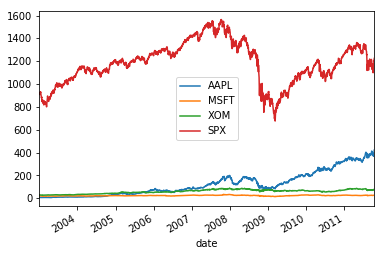

In [11]:
stock.plot()

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


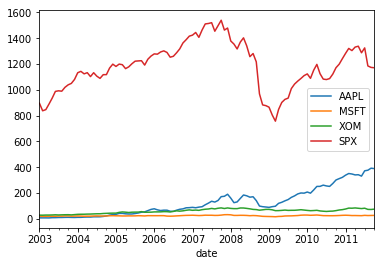

In [12]:
stock.resample('M', how='mean').plot()